In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [3]:
# Load ground-truth sf data
df_sf = pd.read_csv('/Users/wooyongjung/WJ_Projects/HomelessStudy_SanFrancisco_2025_rev/data/sf_tent.csv')

# Drop rows with NaN in 'date' column
df_sf = df_sf.dropna(subset=['date'], axis=0)

# Create timestamp column in df_sf using year, month, and day
df_sf.rename(columns={'date': 'day'}, inplace=True)
df_sf['timestamp'] = pd.to_datetime(df_sf[['year', 'month', 'day']])

df_sf

,year,month,day,tents,structure,sites,tent_struc,timestamp
3,2019,4,23.0,207.0,173.0,442.0,380,2019-04-23
4,2019,4,24.0,207.0,173.0,442.0,380,2019-04-24
5,2019,7,23.0,264.0,187.0,437.0,451,2019-07-23
6,2019,7,24.0,264.0,187.0,437.0,451,2019-07-24
7,2019,10,23.0,272.0,175.0,501.0,447,2019-10-23
8,2020,1,22.0,459.0,190.0,601.0,649,2020-01-22
9,2020,4,20.0,897.0,211.0,427.0,1108,2020-04-20
10,2020,4,21.0,897.0,211.0,427.0,1108,2020-04-21
11,2020,4,22.0,897.0,211.0,427.0,1108,2020-04-22
12,2020,7,29.0,790.0,213.0,426.0,1003,2020-07-29


In [7]:
df_baseline = pd.read_csv('data/city_daily_predictions_baselines.csv')
df_baseline.head()

,date,expected_total,sim_mean,sim_q05,sim_q50,sim_q95,active_boxes,model,city_truth
0,2016-01-01,264.518330,265.528,241.00,264.0,293.00,200,LightGBM-Poisson,40.0
1,2016-01-02,300.936071,299.486,271.00,300.0,331.00,226,LightGBM-Poisson,69.0
2,2016-01-03,201.335673,202.120,179.00,202.0,226.00,148,LightGBM-Poisson,71.0
3,2016-01-04,248.946792,248.376,222.95,249.0,273.00,181,LightGBM-Poisson,102.0
4,2016-01-05,558.361832,557.620,519.00,557.0,595.05,421,LightGBM-Poisson,85.0


In [8]:
# Convert data in df_baseline to timestamp
df_baseline['timestamp'] = pd.to_datetime(df_baseline['date'])
df_baseline.head()

,date,expected_total,sim_mean,sim_q05,sim_q50,sim_q95,active_boxes,model,city_truth,timestamp
0,2016-01-01,264.518330,265.528,241.00,264.0,293.00,200,LightGBM-Poisson,40.0,2016-01-01
1,2016-01-02,300.936071,299.486,271.00,300.0,331.00,226,LightGBM-Poisson,69.0,2016-01-02
2,2016-01-03,201.335673,202.120,179.00,202.0,226.00,148,LightGBM-Poisson,71.0,2016-01-03
3,2016-01-04,248.946792,248.376,222.95,249.0,273.00,181,LightGBM-Poisson,102.0,2016-01-04
4,2016-01-05,558.361832,557.620,519.00,557.0,595.05,421,LightGBM-Poisson,85.0,2016-01-05


In [9]:
# Merge df_baseline and df_sf on 'timestamp'
df_merge_baseline = df_baseline.merge(df_sf[df_sf['timestamp'] < '2025-01-01'][['timestamp', 'tents', 'tent_struc']], on='timestamp', how='left')

In [42]:
df_merge_baseline.head()

,date,expected_total,sim_mean,sim_q05,sim_q50,sim_q95,active_boxes,model,city_truth,timestamp,tents,tent_struc
0,2016-01-01,264.518330,265.528,241.00,264.0,293.00,200,LightGBM-Poisson,40.0,2016-01-01,NaN,NaN
1,2016-01-02,300.936071,299.486,271.00,300.0,331.00,226,LightGBM-Poisson,69.0,2016-01-02,NaN,NaN
2,2016-01-03,201.335673,202.120,179.00,202.0,226.00,148,LightGBM-Poisson,71.0,2016-01-03,NaN,NaN
3,2016-01-04,248.946792,248.376,222.95,249.0,273.00,181,LightGBM-Poisson,102.0,2016-01-04,NaN,NaN
4,2016-01-05,558.361832,557.620,519.00,557.0,595.05,421,LightGBM-Poisson,85.0,2016-01-05,NaN,NaN


In [50]:
# Load Naive and GLM predictions for comparison
df_baseline2 = pd.read_csv('data/city_daily_predictions_threshold_sweep.csv')

In [51]:
df_baseline2.head()

,date,expected_total,sim_mean,sim_q05,sim_q50,sim_q95,active_boxes,model,p_thresh,city_truth
0,2016-01-01,4379.569826,4377.300,4259.95,4380.5,4499.05,4379,PoissonGLM_L2,0.2,40.0
1,2016-01-02,4336.232434,4338.504,4233.95,4340.0,4445.00,4379,PoissonGLM_L2,0.2,69.0
2,2016-01-03,4372.646840,4376.622,4267.85,4373.5,4482.00,4379,PoissonGLM_L2,0.2,71.0
3,2016-01-04,4431.216829,4433.404,4317.75,4437.0,4530.00,4379,PoissonGLM_L2,0.2,102.0
4,2016-01-05,4441.208519,4432.496,4321.90,4434.0,4549.05,4379,PoissonGLM_L2,0.2,85.0


In [52]:
# Convert data in df_baseline2 to timestamp
df_baseline2['timestamp'] = pd.to_datetime(df_baseline2['date'])

# Merge df_baseline2 and df_sf on 'timestamp'
df_merge_baseline2 = df_baseline2[df_baseline2['p_thresh']==0.3].merge(df_sf[df_sf['timestamp'] < '2025-01-01'][['timestamp', 'tents', 'tent_struc']], on='timestamp', how='left')

# Concatenate df_merge_baseline and df_merge_baseline2
df_merge_baseline = pd.concat([df_merge_baseline[df_merge_baseline['model'] == 'LightGBM-Poisson'], df_merge_baseline2], ignore_index=True)
df_merge_baseline.head()

,date,expected_total,sim_mean,sim_q05,sim_q50,sim_q95,active_boxes,model,city_truth,timestamp,tents,tent_struc,p_thresh
0,2016-01-01,264.518330,265.528,241.00,264.0,293.00,200,LightGBM-Poisson,40.0,2016-01-01,NaN,NaN,NaN
1,2016-01-02,300.936071,299.486,271.00,300.0,331.00,226,LightGBM-Poisson,69.0,2016-01-02,NaN,NaN,NaN
2,2016-01-03,201.335673,202.120,179.00,202.0,226.00,148,LightGBM-Poisson,71.0,2016-01-03,NaN,NaN,NaN
3,2016-01-04,248.946792,248.376,222.95,249.0,273.00,181,LightGBM-Poisson,102.0,2016-01-04,NaN,NaN,NaN
4,2016-01-05,558.361832,557.620,519.00,557.0,595.05,421,LightGBM-Poisson,85.0,2016-01-05,NaN,NaN,NaN


In [53]:
df_merge_baseline['model'].unique()

array(['LightGBM-Poisson', 'PoissonGLM_L2', 'SeasonalNaive_lag7'],
      dtype=object)

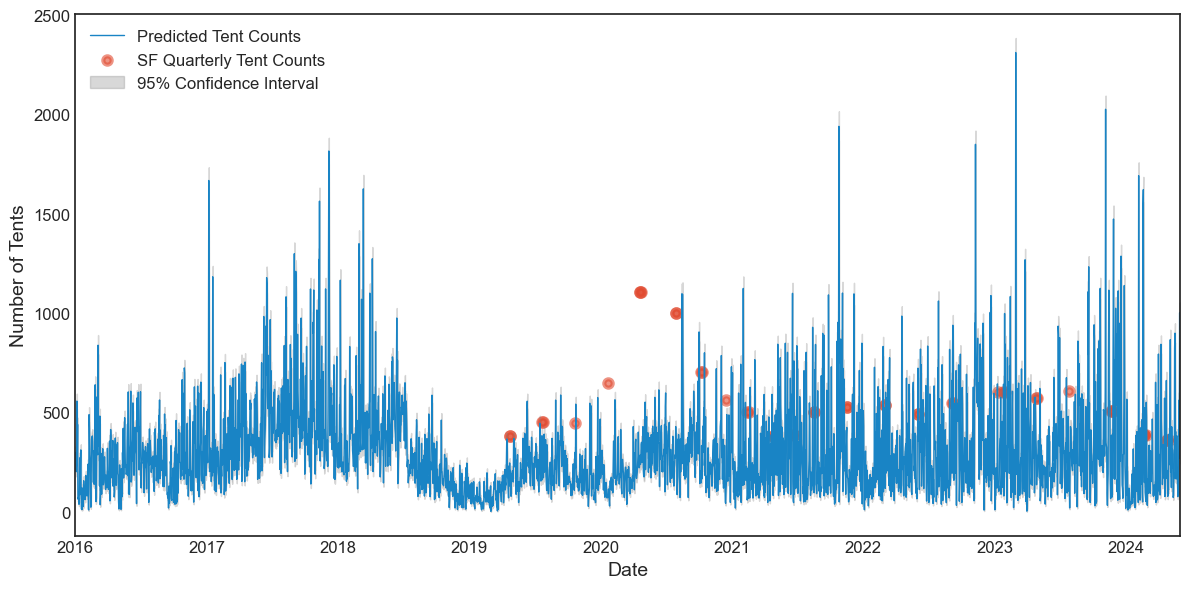

In [54]:
# Baseline: LightGBM-Poisson model predictions vs SF Quarterly Tent Counts

import datetime as dt
import statsmodels.api as sm

start_date = dt.datetime(2016, 1, 1)
end_date = dt.datetime(2024, 5, 31)

# Plot time-series
plt.figure(figsize=(12, 6))
plt.style.use('seaborn-v0_8-white')

# Predicted mean
plt.plot(
    df_merge_baseline[df_merge_baseline['model']=='LightGBM-Poisson']['timestamp'], 
    df_merge_baseline[df_merge_baseline['model']=='LightGBM-Poisson']['sim_mean'], 
    label='Predicted Tent Counts', 
    color='#1984c5',
    linewidth=1
)

plt.scatter(
    df_merge_baseline[df_merge_baseline['model']=='LightGBM-Poisson']['timestamp'], 
    df_merge_baseline[df_merge_baseline['model']=='LightGBM-Poisson']['tent_struc'], 
    label='SF Quarterly Tent Counts', 
    alpha=0.6, 
    marker='o',
    color='#e14b31',
    linewidth=3
)

# Uncertainty band
plt.fill_between(
    df_merge_baseline[df_merge_baseline['model']=='LightGBM-Poisson']['timestamp'],
    df_merge_baseline[df_merge_baseline['model']=='LightGBM-Poisson']['sim_q05'],
    df_merge_baseline[df_merge_baseline['model']=='LightGBM-Poisson']['sim_q95'],
    color='grey',
    alpha=0.3,
    label='95% Confidence Interval'
)

plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Tents', fontsize=14)
plt.legend(fontsize=12)
#plt.ylim(0,1200)
plt.xlim(start_date, end_date)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.tight_layout()
plt.show()

In [55]:
df_baseline['model'].unique()

array(['LightGBM-Poisson', 'PoissonGLM_L2', 'SeasonalNaive_lag7'],
      dtype=object)

In [58]:
df_baseline2[df_baseline2['model']=='PoissonGLM_L2']

,date,expected_total,sim_mean,sim_q05,sim_q50,sim_q95,active_boxes,model,p_thresh,city_truth,timestamp
0,2016-01-01,4379.569826,4377.300,4259.95,4380.5,4499.05,4379,PoissonGLM_L2,0.2,40.0,2016-01-01
1,2016-01-02,4336.232434,4338.504,4233.95,4340.0,4445.00,4379,PoissonGLM_L2,0.2,69.0,2016-01-02
2,2016-01-03,4372.646840,4376.622,4267.85,4373.5,4482.00,4379,PoissonGLM_L2,0.2,71.0,2016-01-03
3,2016-01-04,4431.216829,4433.404,4317.75,4437.0,4530.00,4379,PoissonGLM_L2,0.2,102.0,2016-01-04
4,2016-01-05,4441.208519,4432.496,4321.90,4434.0,4549.05,4379,PoissonGLM_L2,0.2,85.0,2016-01-05
...,...,...,...,...,...,...,...,...,...,...,...
15365,2024-05-27,4539.845373,4532.474,4418.85,4533.0,4643.05,4360,PoissonGLM_L2,0.6,54.0,2024-05-27
15366,2024-05-28,4611.066279,4607.802,4494.95,4611.0,4716.00,4372,PoissonGLM_L2,0.6,67.0,2024-05-28
15367,2024-05-29,4689.273748,4689.694,4574.95,4690.0,4807.15,4376,PoissonGLM_L2,0.6,78.0,2024-05-29
15368,2024-05-30,4628.785896,4634.592,4524.90,4635.0,4751.05,4370,PoissonGLM_L2,0.6,53.0,2024-05-30


In [57]:
df_merge_baseline[df_merge_baseline['model']=='PoissonGLM_L2']

,date,expected_total,sim_mean,sim_q05,sim_q50,sim_q95,active_boxes,model,city_truth,timestamp,tents,tent_struc,p_thresh
3072,2016-01-01,4379.569826,4381.678,4281.95,4380.5,4485.05,4379,PoissonGLM_L2,40.0,2016-01-01,NaN,NaN,0.3
3073,2016-01-02,4336.232434,4338.588,4236.00,4338.0,4443.05,4379,PoissonGLM_L2,69.0,2016-01-02,NaN,NaN,0.3
3074,2016-01-03,4372.646840,4369.192,4258.85,4365.0,4487.05,4379,PoissonGLM_L2,71.0,2016-01-03,NaN,NaN,0.3
3075,2016-01-04,4431.216829,4432.774,4329.00,4429.0,4553.15,4379,PoissonGLM_L2,102.0,2016-01-04,NaN,NaN,0.3
3076,2016-01-05,4441.208519,4440.966,4322.95,4446.0,4548.05,4379,PoissonGLM_L2,85.0,2016-01-05,NaN,NaN,0.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6141,2024-05-27,4556.965686,4556.848,4455.00,4554.0,4667.10,4379,PoissonGLM_L2,54.0,2024-05-27,NaN,NaN,0.3
6142,2024-05-28,4617.400693,4618.782,4508.95,4614.0,4738.10,4379,PoissonGLM_L2,67.0,2024-05-28,NaN,NaN,0.3
6143,2024-05-29,4691.984928,4681.518,4567.75,4683.5,4791.00,4379,PoissonGLM_L2,78.0,2024-05-29,NaN,NaN,0.3
6144,2024-05-30,4636.931443,4637.498,4528.95,4640.5,4740.00,4379,PoissonGLM_L2,53.0,2024-05-30,NaN,NaN,0.3


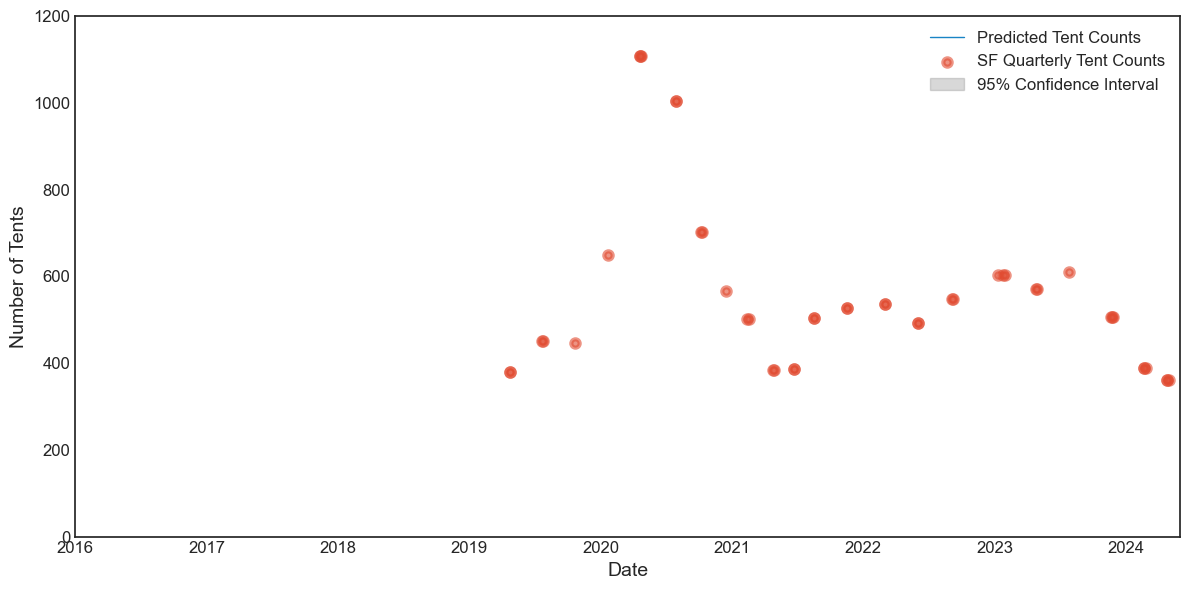

In [56]:
# Baseline: GLM model predictions vs SF Quarterly Tent Counts

import datetime as dt
import statsmodels.api as sm

start_date = dt.datetime(2016, 1, 1)
end_date = dt.datetime(2024, 5, 31)

# Plot time-series
plt.figure(figsize=(12, 6))
plt.style.use('seaborn-v0_8-white')

# Predicted mean
plt.plot(
    df_merge_baseline[df_merge_baseline['model']=='PoissonGLM_L2']['timestamp'], 
    df_merge_baseline[df_merge_baseline['model']=='PoissonGLM_L2']['sim_mean'], 
    label='Predicted Tent Counts', 
    color='#1984c5',
    linewidth=1
)

plt.scatter(
    df_merge_baseline[df_merge_baseline['model']=='PoissonGLM_L2']['timestamp'], 
    df_merge_baseline[df_merge_baseline['model']=='PoissonGLM_L2']['tent_struc'], 
    label='SF Quarterly Tent Counts', 
    alpha=0.6, 
    marker='o',
    color='#e14b31',
    linewidth=3
)

# Uncertainty band
plt.fill_between(
    df_merge_baseline[df_merge_baseline['model']=='PoissonGLM_L2']['timestamp'],
    df_merge_baseline[df_merge_baseline['model']=='PoissonGLM_L2']['sim_q05'],
    df_merge_baseline[df_merge_baseline['model']=='PoissonGLM_L2']['sim_q95'],
    color='grey',
    alpha=0.3,
    label='95% Confidence Interval'
)

plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Tents', fontsize=14)
plt.legend(fontsize=12)
plt.ylim(0,1200)
plt.xlim(start_date, end_date)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.tight_layout()
plt.show()

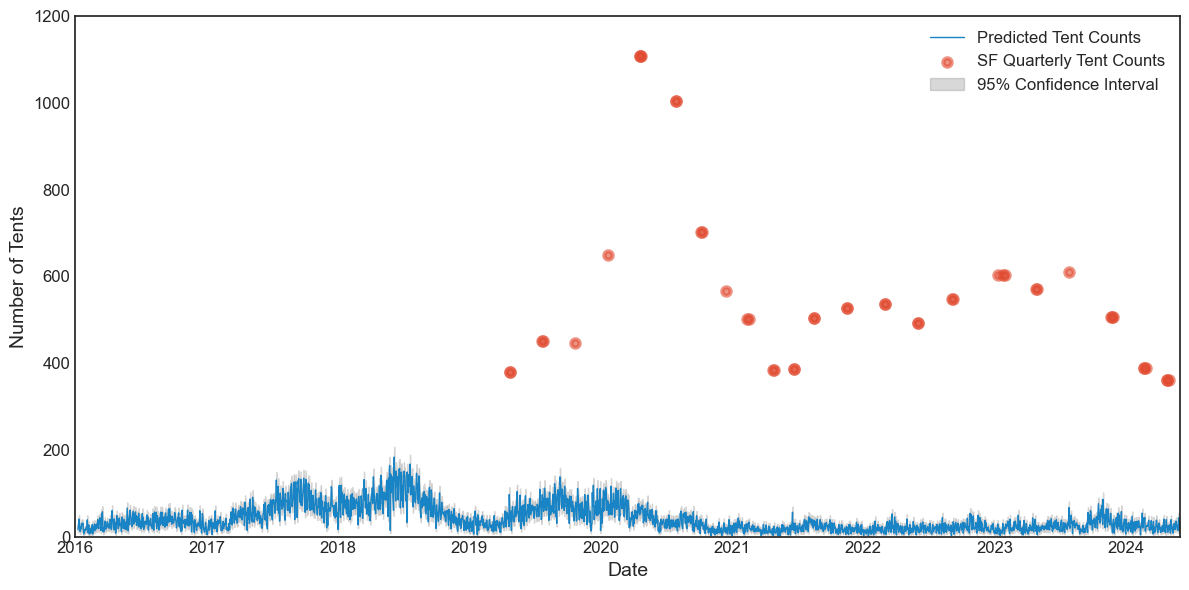

In [ ]:
# Baseline: SeasonalNaive_lag7 model predictions vs SF Quarterly Tent Counts

import datetime as dt
import statsmodels.api as sm

start_date = dt.datetime(2016, 1, 1)
end_date = dt.datetime(2024, 5, 31)

# Plot time-series
plt.figure(figsize=(12, 6))
plt.style.use('seaborn-v0_8-white')

# Predicted mean
plt.plot(
    df_merge_baseline[df_merge_baseline['model']=='SeasonalNaive_lag7']['timestamp'], 
    df_merge_baseline[df_merge_baseline['model']=='SeasonalNaive_lag7']['sim_mean'], 
    label='Predicted Tent Counts', 
    color='#1984c5',
    linewidth=1
)

plt.scatter(
    df_merge_baseline[df_merge_baseline['model']=='SeasonalNaive_lag7']['timestamp'], 
    df_merge_baseline[df_merge_baseline['model']=='SeasonalNaive_lag7']['tent_struc'], 
    label='SF Quarterly Tent Counts', 
    alpha=0.6, 
    marker='o',
    color='#e14b31',
    linewidth=3
)

# Uncertainty band
plt.fill_between(
    df_merge_baseline[df_merge_baseline['model']=='SeasonalNaive_lag7']['timestamp'],
    df_merge_baseline[df_merge_baseline['model']=='SeasonalNaive_lag7']['sim_q05'],
    df_merge_baseline[df_merge_baseline['model']=='SeasonalNaive_lag7']['sim_q95'],
    color='grey',
    alpha=0.3,
    label='95% Confidence Interval'
)

plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Tents', fontsize=14)
plt.legend(fontsize=12)
plt.ylim(0,1200)
plt.xlim(start_date, end_date)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.tight_layout()
plt.show()

In [ ]:
# Calculate RMSE, MAPE, Poisson Deviance, and NLPD for each model in the baseline dataset
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
from scipy.stats import poisson

def calculate_metrics(y_true, y_pred):
    rmse = mean_squared_error(y_true, y_pred)
    mape = mean_absolute_percentage_error(y_true, y_pred)
    poisson_deviance = -2 * (poisson.logpmf(y_true, y_pred).sum())
    nlpd = -poisson.logpmf(y_true, y_pred).mean()
    return rmse, mape, poisson_deviance, nlpd

metrics_results = []
for model in df_merge_baseline['model'].unique():
    df_model = df_merge_baseline[df_merge_baseline['model'] == model]
    y_true = df_model[df_model['tent_struc'].notnull()]['tent_struc']
    y_pred = df_model[df_model['tent_struc'].notnull()]['sim_mean']
    rmse, mape, poisson_deviance, nlpd = calculate_metrics(y_true, y_pred)
    metrics_results.append({
        'model': model,
        'RMSE': rmse,
        'MAPE': mape,
        'Poisson Deviance': poisson_deviance,
        'NLPD': nlpd
    })

metrics_df = pd.DataFrame(metrics_results)
metrics_df = metrics_df.sort_values(by='RMSE').reset_index(drop=True)
metrics_df

,model,RMSE,MAPE,Poisson Deviance,NLPD
0,LightGBM-Poisson,156062.560952,0.572704,22081.788607,245.353207
1,PoissonGLM_L2,289849.916909,0.883940,77630.974828,862.566387
2,SeasonalNaive_lag7,317326.678825,0.940180,109079.949209,1211.999436


In [25]:
# Load our model's predictions for comparison with baseline models
df_stvgp = pd.read_csv('data/df_daily_69_noclamp_with_sf_tent.csv')
df_stvgp['timestamp'] = pd.to_datetime(df_stvgp['timestamp'])
df_stvgp.head()

,timestamp,mean_total,median_total,lower95,upper95,lower90,upper90,tents,tent_struc
0,2016-01-01,164.700,164.0,140.475,193.000,144.95,188.0,NaN,NaN
1,2016-01-02,193.914,194.0,168.475,220.525,172.00,216.0,NaN,NaN
2,2016-01-03,222.442,222.0,193.000,251.000,197.00,247.0,NaN,NaN
3,2016-01-04,228.514,229.0,200.000,256.000,205.00,252.0,NaN,NaN
4,2016-01-05,194.942,195.0,168.000,222.000,172.00,219.0,NaN,NaN


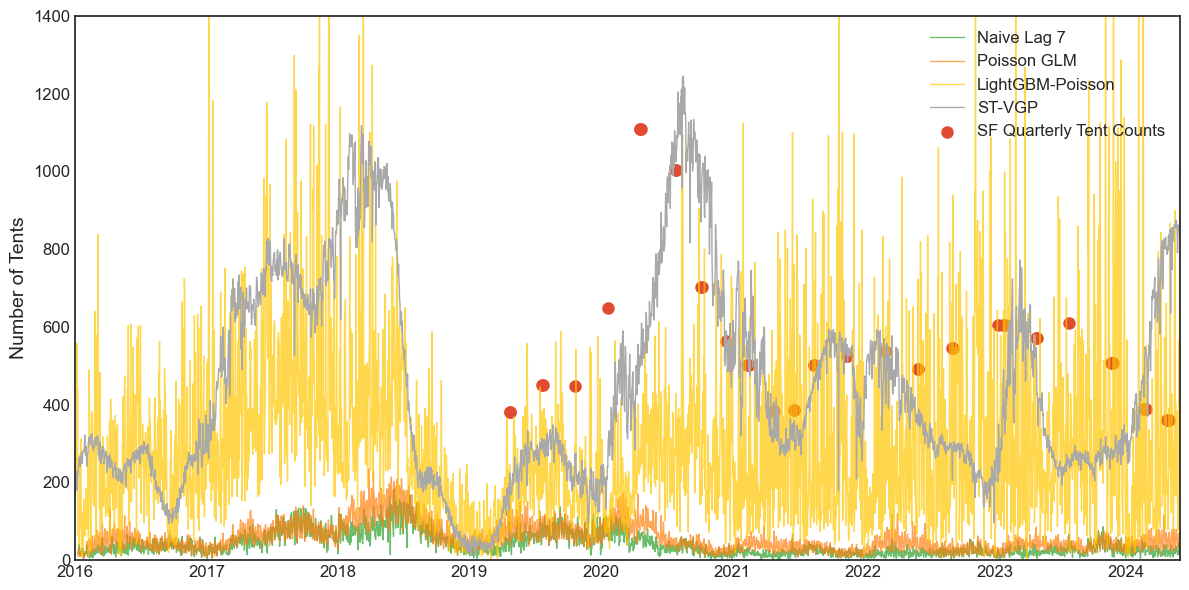

In [41]:
# Compare ST-VGP with Baseline models

start_date = dt.datetime(2016, 1, 1)
end_date = dt.datetime(2024, 5, 31)

# Plot time-series
plt.figure(figsize=(12, 6))
plt.style.use('seaborn-v0_8-white')

# Seasonal Naive Lag 7
plt.plot(
    df_merge_baseline[df_merge_baseline['model']=='SeasonalNaive_lag7']['timestamp'], 
    df_merge_baseline[df_merge_baseline['model']=='SeasonalNaive_lag7']['sim_mean'], 
    label='Naive Lag 7', 
    color='#2ca02c',
    alpha=0.7,
    linewidth=1
)

# # Uncertainty band
# plt.fill_between(
#     df_merge_baseline[df_merge_baseline['model']=='SeasonalNaive_lag7']['timestamp'],
#     df_merge_baseline[df_merge_baseline['model']=='SeasonalNaive_lag7']['sim_q05'],
#     df_merge_baseline[df_merge_baseline['model']=='SeasonalNaive_lag7']['sim_q95'],
#     color='grey',
#     alpha=0.3
# )

# PoissonGLM_L2
plt.plot(
    df_merge_baseline[df_merge_baseline['model']=='PoissonGLM_L2']['timestamp'], 
    df_merge_baseline[df_merge_baseline['model']=='PoissonGLM_L2']['sim_mean'], 
    label='Poisson GLM', 
    color='#ff7f0e',
    alpha=0.7,
    linewidth=1
)

# # Uncertainty band
# plt.fill_between(
#     df_merge_baseline[df_merge_baseline['model']=='PoissonGLM_L2']['timestamp'],
#     df_merge_baseline[df_merge_baseline['model']=='PoissonGLM_L2']['sim_q05'],
#     df_merge_baseline[df_merge_baseline['model']=='PoissonGLM_L2']['sim_q95'],
#     color='grey',
#     alpha=0.3,
# )


# LightGBM-Poisson
plt.plot(
    df_merge_baseline[df_merge_baseline['model']=='LightGBM-Poisson']['timestamp'], 
    df_merge_baseline[df_merge_baseline['model']=='LightGBM-Poisson']['sim_mean'], 
    label='LightGBM-Poisson', 
    color='#ffc700',
    alpha=0.7,
    linewidth=1
)

# # Uncertainty band
# plt.fill_between(
#     df_merge_baseline[df_merge_baseline['model']=='LightGBM-Poisson']['timestamp'],
#     df_merge_baseline[df_merge_baseline['model']=='LightGBM-Poisson']['sim_q05'],
#     df_merge_baseline[df_merge_baseline['model']=='LightGBM-Poisson']['sim_q95'],
#     color='grey',
#     alpha=0.3,
#     label='95% Confidence Interval'
# )

# ST-VGP
plt.plot(
    df_stvgp['timestamp'], 
    df_stvgp['mean_total'], 
    label='ST-VGP', 
    color='darkgrey',
    linewidth=1
)

plt.scatter(
    df_stvgp['timestamp'], 
    df_stvgp['tent_struc'], 
    label='SF Quarterly Tent Counts', 
    alpha=1, 
    marker='o',
    color='#e14b31',
    linewidth=3
)

#plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Tents', fontsize=14)
plt.legend(fontsize=12)
plt.xlim(start_date, end_date)
plt.ylim(0,1400)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(loc='upper right', fontsize=12)

plt.tight_layout()
plt.show()